## HEART FAILURE ASSIGNMENT

### Dataset Information

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the datasets
train_data = pd.read_csv('Heart_Failure_Training_Set.csv')
test_data = pd.read_csv('Test_Set_NO_LABELS.csv')

In [4]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
train_data.head()

First few rows of the dataset:


,Patient_ID,Gender,Admission Year,Age At Admission,Length of Stay (Days),Primary Insurance,First Potassium Days From Admit,First Potassium Result,Last Potassium Days From Admit,Last Potassium Result,...,Hx_Vent,Hx_Cath,Hx_Renal_Failure,Hx_Pvd,Hx_Valve_Procedure,Hx_Dm,Hx_Ckd,Hx_Ihd,Hx_Aortic_Valve_Problem,Hx_Prior_Admit
0,1616,FEMALE,2020,89.039440,6.008976,TBD,0.150694,3.0,5.616078,4.0,...,False,False,False,False,False,False,False,False,False,False
1,5717,MALE,2020,69.429830,2.596738,TBD,0.112500,3.9,2.358333,4.1,...,False,False,False,False,False,True,False,False,False,True
2,5922,MALE,2019,67.465759,2.046528,TBD,NaN,NaN,NaN,NaN,...,False,False,False,False,False,True,True,False,False,True
3,2054,FEMALE,2019,61.347314,1.644444,TBD,0.033941,4.2,0.055349,3.9,...,False,False,True,False,False,True,True,False,False,True
4,5810,MALE,2019,83.347254,2.253531,TBD,0.278472,4.7,1.738194,3.8,...,False,False,False,False,False,True,False,False,False,True


In [5]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
test_data.head()

First few rows of the dataset:


,Patient_ID,Gender,Admission Year,Age At Admission,Length of Stay (Days),Primary Insurance,First Potassium Days From Admit,First Potassium Result,Last Potassium Days From Admit,Last Potassium Result,...,Hx_Vent,Hx_Cath,Hx_Renal_Failure,Hx_Pvd,Hx_Valve_Procedure,Hx_Dm,Hx_Ckd,Hx_Ihd,Hx_Aortic_Valve_Problem,Hx_Prior_Admit
0,85,FEMALE,2019,75.761482,5.818750,TBD,1.090278,4.1,7.388618,4.0,...,False,False,False,True,False,False,True,False,False,True
1,89,FEMALE,2020,50.325190,0.906011,TBD,0.295833,4.2,0.433250,4.3,...,False,False,False,False,False,False,False,False,False,True
2,90,FEMALE,2020,67.305105,6.537992,TBD,0.688603,3.0,5.863145,4.0,...,False,False,False,True,False,False,True,False,False,True
3,98,FEMALE,2020,86.082575,1.062054,TBD,0.441667,4.8,0.790984,4.9,...,False,False,False,False,False,False,False,False,False,False
4,107,FEMALE,2019,66.974902,12.316098,TBD,0.098213,4.4,11.804439,4.3,...,True,False,False,False,False,True,False,True,True,False


In [6]:
# Display basic information about the datasets
print("\nTraining Dataset Information:")
train_data.info()


Training Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5914 entries, 0 to 5913
Data columns (total 95 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Patient_ID                              5914 non-null   int64  
 1   Gender                                  5914 non-null   object 
 2   Admission Year                          5914 non-null   int64  
 3   Age At Admission                        5914 non-null   float64
 4   Length of Stay (Days)                   5914 non-null   float64
 5   Primary Insurance                       5662 non-null   object 
 6   First Potassium Days From Admit         5676 non-null   float64
 7   First Potassium Result                  5673 non-null   float64
 8   Last Potassium Days From Admit          5675 non-null   float64
 9   Last Potassium Result                   5673 non-null   float64
 10  Min Potassium Days From Admit

In [7]:
print("\nTest Dataset Information:")
test_data.info()


Test Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479 entries, 0 to 1478
Data columns (total 94 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Patient_ID                              1479 non-null   int64  
 1   Gender                                  1479 non-null   object 
 2   Admission Year                          1479 non-null   int64  
 3   Age At Admission                        1479 non-null   float64
 4   Length of Stay (Days)                   1479 non-null   float64
 5   Primary Insurance                       1418 non-null   object 
 6   First Potassium Days From Admit         1421 non-null   float64
 7   First Potassium Result                  1421 non-null   float64
 8   Last Potassium Days From Admit          1420 non-null   float64
 9   Last Potassium Result                   1422 non-null   float64
 10  Min Potassium Days From Admit    

### NaN Values

In [8]:
# Identify and count missing values in the training dataset
missing_values_train = train_data.isna().sum()
print("Missing values in each column of the training dataset:")
print(missing_values_train)

# Identify and count missing values in the test dataset
missing_values_test = test_data.isna().sum()
print("\nMissing values in each column of the test dataset:")
print(missing_values_test)


Missing values in each column of the training dataset:
Patient_ID                 0
Gender                     0
Admission Year             0
Age At Admission           0
Length of Stay (Days)      0
                          ..
Hx_Dm                      0
Hx_Ckd                     0
Hx_Ihd                     0
Hx_Aortic_Valve_Problem    0
Hx_Prior_Admit             0
Length: 95, dtype: int64

Missing values in each column of the test dataset:
Patient_ID                 0
Gender                     0
Admission Year             0
Age At Admission           0
Length of Stay (Days)      0
                          ..
Hx_Dm                      0
Hx_Ckd                     0
Hx_Ihd                     0
Hx_Aortic_Valve_Problem    0
Hx_Prior_Admit             0
Length: 94, dtype: int64


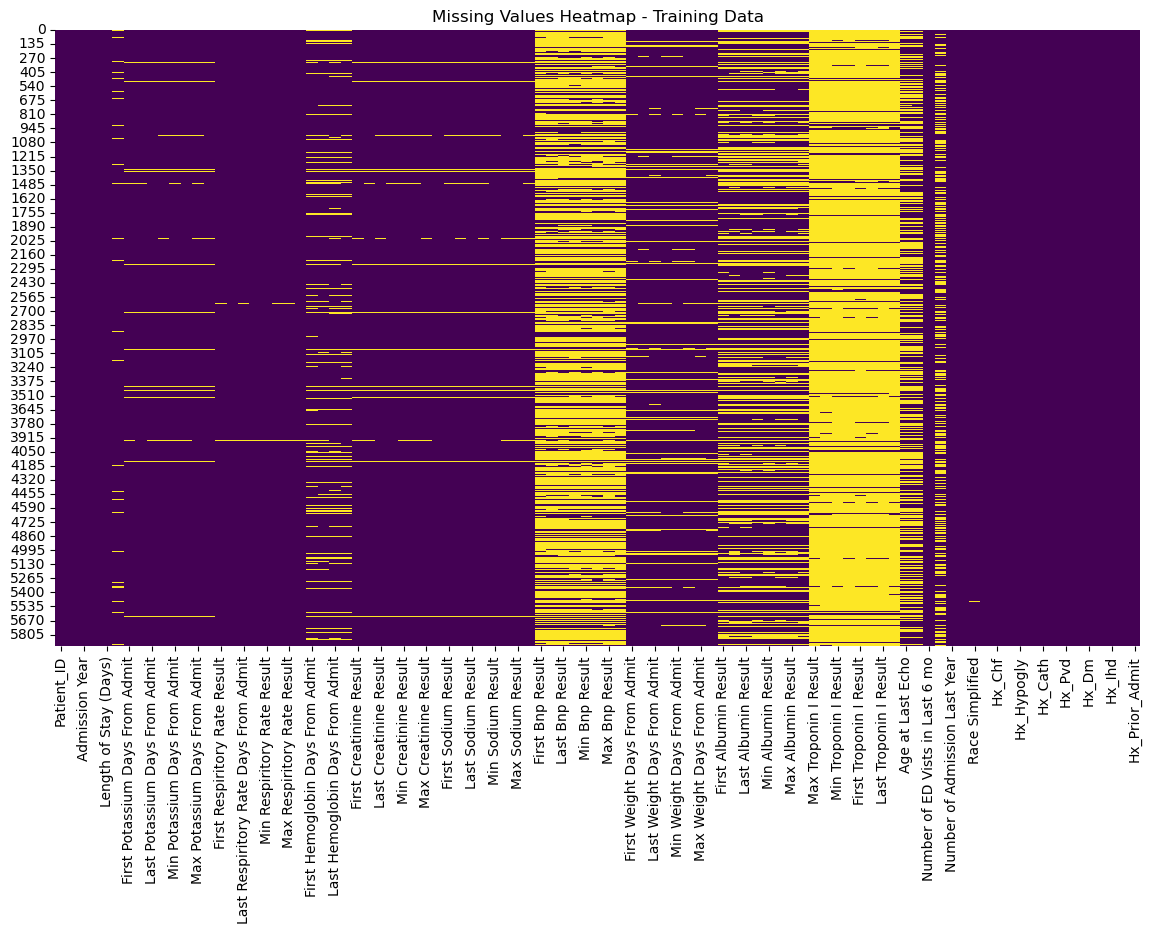

<Figure size 640x480 with 0 Axes>

In [9]:
# Visualize missing values (optional)

plt.figure(figsize=(14, 8))
sns.heatmap(train_data.isna(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap - Training Data")
plt.show()

# Save the figure to a file
plt.savefig("missing_values_heatmap.jpg")


In [10]:
train_data.head(10)

,Patient_ID,Gender,Admission Year,Age At Admission,Length of Stay (Days),Primary Insurance,First Potassium Days From Admit,First Potassium Result,Last Potassium Days From Admit,Last Potassium Result,...,Hx_Vent,Hx_Cath,Hx_Renal_Failure,Hx_Pvd,Hx_Valve_Procedure,Hx_Dm,Hx_Ckd,Hx_Ihd,Hx_Aortic_Valve_Problem,Hx_Prior_Admit
0,1616,FEMALE,2020,89.039440,6.008976,TBD,0.150694,3.0,5.616078,4.0,...,False,False,False,False,False,False,False,False,False,False
1,5717,MALE,2020,69.429830,2.596738,TBD,0.112500,3.9,2.358333,4.1,...,False,False,False,False,False,True,False,False,False,True
2,5922,MALE,2019,67.465759,2.046528,TBD,NaN,NaN,NaN,NaN,...,False,False,False,False,False,True,True,False,False,True
3,2054,FEMALE,2019,61.347314,1.644444,TBD,0.033941,4.2,0.055349,3.9,...,False,False,True,False,False,True,True,False,False,True
4,5810,MALE,2019,83.347254,2.253531,TBD,0.278472,4.7,1.738194,3.8,...,False,False,False,False,False,True,False,False,False,True
5,3849,FEMALE,2020,88.064803,3.002336,NaN,0.790278,3.9,4.052522,3.5,...,False,False,False,False,False,True,True,False,True,True
6,1195,FEMALE,2019,82.909920,3.877643,TBD,0.279861,3.3,3.077088,3.8,...,False,False,False,False,False,False,True,False,False,True
7,937,FEMALE,2019,55.314172,5.188834,TBD,0.429167,3.5,4.782639,3.6,...,False,False,True,True,False,False,True,False,True,True
8,4094,MALE,2020,62.090937,4.720489,TBD,1.945953,3.9,2.429861,3.9,...,False,False,False,False,False,False,False,False,False,False
9,6731,MALE,2020,79.440928,1.783333,TBD,2.467384,4.0,1.502778,4.0,...,False,False,False,True,False,True,True,True,False,True


## Dataset cleaning

#### Types of variables

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5914 entries, 0 to 5913
Data columns (total 95 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Patient_ID                              5914 non-null   int64  
 1   Gender                                  5914 non-null   object 
 2   Admission Year                          5914 non-null   int64  
 3   Age At Admission                        5914 non-null   float64
 4   Length of Stay (Days)                   5914 non-null   float64
 5   Primary Insurance                       5662 non-null   object 
 6   First Potassium Days From Admit         5676 non-null   float64
 7   First Potassium Result                  5673 non-null   float64
 8   Last Potassium Days From Admit          5675 non-null   float64
 9   Last Potassium Result                   5673 non-null   float64
 10  Min Potassium Days From Admit           5677 non-null   floa

#### Display the total number of NaN values for each variable

In [12]:
# Display the total number of NaN values for each variable in the training dataset
nan_counts_train = train_data.isna().sum()
print("NaN counts in Training Dataset:\n", nan_counts_train)


NaN counts in Training Dataset:
 Patient_ID                 0
Gender                     0
Admission Year             0
Age At Admission           0
Length of Stay (Days)      0
                          ..
Hx_Dm                      0
Hx_Ckd                     0
Hx_Ihd                     0
Hx_Aortic_Valve_Problem    0
Hx_Prior_Admit             0
Length: 95, dtype: int64


In [13]:
# Display the total number of NaN values for each variable in the test dataset
nan_counts_test = test_data.isna().sum()
print("\nNaN counts in Test Dataset:\n", nan_counts_test)


NaN counts in Test Dataset:
 Patient_ID                 0
Gender                     0
Admission Year             0
Age At Admission           0
Length of Stay (Days)      0
                          ..
Hx_Dm                      0
Hx_Ckd                     0
Hx_Ihd                     0
Hx_Aortic_Valve_Problem    0
Hx_Prior_Admit             0
Length: 94, dtype: int64


In [14]:
# Sort the variables by the number of NaN values, with the highest number of NaNs first
nan_counts_sorted = nan_counts_train.sort_values(ascending=False)
nan_counts_sorted

First Troponin I Result             5442
Max Troponin I Result               5441
Last Troponin I Result              5439
Last Troponin I Days From Admit     5437
First Troponin I Days From Admit    5434
                                    ... 
Gender                                 0
Length of Stay (Days)                  0
Age At Admission                       0
Admission Year                         0
Hx_Prior_Admit                         0
Length: 95, dtype: int64

In [15]:
# Sort the variables by the number of NaN values, with the highest number of NaNs first
nan_counts_sorted = nan_counts_test.sort_values(ascending=False)
nan_counts_sorted

Min Troponin I Days From Admit      1386
First Troponin I Days From Admit    1383
Min Troponin I Result               1383
Max Troponin I Days From Admit      1382
Last Troponin I Result              1381
                                    ... 
Gender                                 0
Length of Stay (Days)                  0
Age At Admission                       0
Admission Year                         0
Hx_Prior_Admit                         0
Length: 94, dtype: int64

#### Removing rows or columns with too many missing values

In [16]:
# Set a threshold for the maximum percentage of missing values allowed
column_threshold = 0.5  # 50%
row_threshold = 0.5  # 50%

# Drop columns with more than 50% missing values
df_few_nans = train_data.dropna(thresh=int((1 - column_threshold) * len(train_data)), axis=1)

# Drop rows with more than 50% missing values
df_few_nans = df_few_nans.dropna(thresh=int((1 - row_threshold) * len(df_few_nans.columns)), axis=0)

# Display the shape of the cleaned dataframe
df_few_nans.shape


(5814, 79)

In [17]:
# Set a threshold for the maximum percentage of missing values allowed
column_threshold = 0.5  # 50%
row_threshold = 0.5  # 50%

# Drop columns with more than 50% missing values in the training data
train_data_few_nans = train_data.dropna(thresh=int((1 - column_threshold) * len(train_data)), axis=1)

# Drop rows with more than 50% missing values in the training data
train_data_few_nans = train_data_few_nans.dropna(thresh=int((1 - row_threshold) * len(train_data_few_nans.columns)), axis=0)

# Display the shape of the cleaned training dataframe
train_data_few_nans.shape


(5814, 79)

In [18]:
train_data_few_nans.head(10)

,Patient_ID,Gender,Admission Year,Age At Admission,Length of Stay (Days),Primary Insurance,First Potassium Days From Admit,First Potassium Result,Last Potassium Days From Admit,Last Potassium Result,...,Hx_Vent,Hx_Cath,Hx_Renal_Failure,Hx_Pvd,Hx_Valve_Procedure,Hx_Dm,Hx_Ckd,Hx_Ihd,Hx_Aortic_Valve_Problem,Hx_Prior_Admit
0,1616,FEMALE,2020,89.039440,6.008976,TBD,0.150694,3.0,5.616078,4.0,...,False,False,False,False,False,False,False,False,False,False
1,5717,MALE,2020,69.429830,2.596738,TBD,0.112500,3.9,2.358333,4.1,...,False,False,False,False,False,True,False,False,False,True
2,5922,MALE,2019,67.465759,2.046528,TBD,NaN,NaN,NaN,NaN,...,False,False,False,False,False,True,True,False,False,True
3,2054,FEMALE,2019,61.347314,1.644444,TBD,0.033941,4.2,0.055349,3.9,...,False,False,True,False,False,True,True,False,False,True
4,5810,MALE,2019,83.347254,2.253531,TBD,0.278472,4.7,1.738194,3.8,...,False,False,False,False,False,True,False,False,False,True
5,3849,FEMALE,2020,88.064803,3.002336,NaN,0.790278,3.9,4.052522,3.5,...,False,False,False,False,False,True,True,False,True,True
6,1195,FEMALE,2019,82.909920,3.877643,TBD,0.279861,3.3,3.077088,3.8,...,False,False,False,False,False,False,True,False,False,True
7,937,FEMALE,2019,55.314172,5.188834,TBD,0.429167,3.5,4.782639,3.6,...,False,False,True,True,False,False,True,False,True,True
8,4094,MALE,2020,62.090937,4.720489,TBD,1.945953,3.9,2.429861,3.9,...,False,False,False,False,False,False,False,False,False,False
9,6731,MALE,2020,79.440928,1.783333,TBD,2.467384,4.0,1.502778,4.0,...,False,False,False,True,False,True,True,True,False,True


#### Filling missing values with the mean

In [19]:
# Filling missing values with the mean of each column in the cleaned training data
train_data_filled = train_data_few_nans.fillna(train_data_few_nans.mean())

# Display the first few rows to confirm the filling
train_data_filled.head(10)


/tmp/ipykernel_171091/2239144567.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data_filled = train_data_few_nans.fillna(train_data_few_nans.mean())


,Patient_ID,Gender,Admission Year,Age At Admission,Length of Stay (Days),Primary Insurance,First Potassium Days From Admit,First Potassium Result,Last Potassium Days From Admit,Last Potassium Result,...,Hx_Vent,Hx_Cath,Hx_Renal_Failure,Hx_Pvd,Hx_Valve_Procedure,Hx_Dm,Hx_Ckd,Hx_Ihd,Hx_Aortic_Valve_Problem,Hx_Prior_Admit
0,1616,FEMALE,2020,89.039440,6.008976,TBD,0.150694,3.000000,5.616078,4.000000,...,False,False,False,False,False,False,False,False,False,False
1,5717,MALE,2020,69.429830,2.596738,TBD,0.112500,3.900000,2.358333,4.100000,...,False,False,False,False,False,True,False,False,False,True
2,5922,MALE,2019,67.465759,2.046528,TBD,0.549179,4.118501,4.533956,4.065731,...,False,False,False,False,False,True,True,False,False,True
3,2054,FEMALE,2019,61.347314,1.644444,TBD,0.033941,4.200000,0.055349,3.900000,...,False,False,True,False,False,True,True,False,False,True
4,5810,MALE,2019,83.347254,2.253531,TBD,0.278472,4.700000,1.738194,3.800000,...,False,False,False,False,False,True,False,False,False,True
5,3849,FEMALE,2020,88.064803,3.002336,NaN,0.790278,3.900000,4.052522,3.500000,...,False,False,False,False,False,True,True,False,True,True
6,1195,FEMALE,2019,82.909920,3.877643,TBD,0.279861,3.300000,3.077088,3.800000,...,False,False,False,False,False,False,True,False,False,True
7,937,FEMALE,2019,55.314172,5.188834,TBD,0.429167,3.500000,4.782639,3.600000,...,False,False,True,True,False,False,True,False,True,True
8,4094,MALE,2020,62.090937,4.720489,TBD,1.945953,3.900000,2.429861,3.900000,...,False,False,False,False,False,False,False,False,False,False
9,6731,MALE,2020,79.440928,1.783333,TBD,2.467384,4.000000,1.502778,4.000000,...,False,False,False,True,False,True,True,True,False,True


#### Type of remaining variables

In [20]:
# Display all columns and their data types in the filled training data
train_data_filled.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5814 entries, 0 to 5913
Data columns (total 79 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Patient_ID                              5814 non-null   int64  
 1   Gender                                  5814 non-null   object 
 2   Admission Year                          5814 non-null   int64  
 3   Age At Admission                        5814 non-null   float64
 4   Length of Stay (Days)                   5814 non-null   float64
 5   Primary Insurance                       5567 non-null   object 
 6   First Potassium Days From Admit         5814 non-null   float64
 7   First Potassium Result                  5814 non-null   float64
 8   Last Potassium Days From Admit          5814 non-null   float64
 9   Last Potassium Result                   5814 non-null   float64
 10  Min Potassium Days From Admit           5814 non-null   floa

We still have 2 categorical variables with Nans : Primary Insurance & Race Simplified

In [21]:
# Impute missing values in 'Primary Insurance' with the mode (most common value) in the training data
primary_insurance_mode = train_data_filled['Primary Insurance'].mode()[0]
train_data_filled['Primary Insurance'].fillna(primary_insurance_mode, inplace=True)


In [22]:
# For 'Race Simplified', fill missing values with 'Unknown' in the training data
train_data_filled['Race Simplified'].fillna('Unknown', inplace=True)


In [23]:
# Display all columns and their data types in the filled training data
train_data_filled.info()

# Display the first few rows of the filled training data
train_data_filled.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5814 entries, 0 to 5913
Data columns (total 79 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Patient_ID                              5814 non-null   int64  
 1   Gender                                  5814 non-null   object 
 2   Admission Year                          5814 non-null   int64  
 3   Age At Admission                        5814 non-null   float64
 4   Length of Stay (Days)                   5814 non-null   float64
 5   Primary Insurance                       5814 non-null   object 
 6   First Potassium Days From Admit         5814 non-null   float64
 7   First Potassium Result                  5814 non-null   float64
 8   Last Potassium Days From Admit          5814 non-null   float64
 9   Last Potassium Result                   5814 non-null   float64
 10  Min Potassium Days From Admit           5814 non-null   floa

,Patient_ID,Gender,Admission Year,Age At Admission,Length of Stay (Days),Primary Insurance,First Potassium Days From Admit,First Potassium Result,Last Potassium Days From Admit,Last Potassium Result,...,Hx_Vent,Hx_Cath,Hx_Renal_Failure,Hx_Pvd,Hx_Valve_Procedure,Hx_Dm,Hx_Ckd,Hx_Ihd,Hx_Aortic_Valve_Problem,Hx_Prior_Admit
0,1616,FEMALE,2020,89.039440,6.008976,TBD,0.150694,3.000000,5.616078,4.000000,...,False,False,False,False,False,False,False,False,False,False
1,5717,MALE,2020,69.429830,2.596738,TBD,0.112500,3.900000,2.358333,4.100000,...,False,False,False,False,False,True,False,False,False,True
2,5922,MALE,2019,67.465759,2.046528,TBD,0.549179,4.118501,4.533956,4.065731,...,False,False,False,False,False,True,True,False,False,True
3,2054,FEMALE,2019,61.347314,1.644444,TBD,0.033941,4.200000,0.055349,3.900000,...,False,False,True,False,False,True,True,False,False,True
4,5810,MALE,2019,83.347254,2.253531,TBD,0.278472,4.700000,1.738194,3.800000,...,False,False,False,False,False,True,False,False,False,True


Convert Categorical Variables: encode these into numerical values suitable for modeling

In [24]:
# Identifying categorical variables in the filled training data
categorical_columns = train_data_filled.select_dtypes(include=['object']).columns

print('The categorical variables are:', categorical_columns)


The categorical variables are: Index(['Gender', 'Primary Insurance', 'Race Simplified'], dtype='object')


In [25]:
# Using pandas get_dummies to convert categorical variables to numerical in the filled training data
train_data_encoded = pd.get_dummies(train_data_filled, columns=categorical_columns)

# Display the first few rows of the encoded training data
train_data_encoded.head()


,Patient_ID,Admission Year,Age At Admission,Length of Stay (Days),First Potassium Days From Admit,First Potassium Result,Last Potassium Days From Admit,Last Potassium Result,Min Potassium Days From Admit,Min Potassium Result,...,Hx_Ihd,Hx_Aortic_Valve_Problem,Hx_Prior_Admit,Gender_FEMALE,Gender_MALE,Primary Insurance_TBD,Race Simplified_Black,Race Simplified_Other,Race Simplified_Unknown,Race Simplified_White
0,1616,2020,89.039440,6.008976,0.150694,3.000000,5.616078,4.000000,0.580556,2.800000,...,False,False,False,1,0,1,0,0,0,1
1,5717,2020,69.429830,2.596738,0.112500,3.900000,2.358333,4.100000,0.034722,4.000000,...,False,False,True,0,1,1,0,0,0,1
2,5922,2019,67.465759,2.046528,0.549179,4.118501,4.533956,4.065731,2.381099,3.713127,...,False,False,True,0,1,1,0,0,0,1
3,2054,2019,61.347314,1.644444,0.033941,4.200000,0.055349,3.900000,0.063194,3.900000,...,False,False,True,1,0,1,0,0,0,1
4,5810,2019,83.347254,2.253531,0.278472,4.700000,1.738194,3.800000,2.359028,3.900000,...,False,False,True,0,1,1,0,0,0,1


In [26]:
train_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5814 entries, 0 to 5913
Data columns (total 83 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Patient_ID                              5814 non-null   int64  
 1   Admission Year                          5814 non-null   int64  
 2   Age At Admission                        5814 non-null   float64
 3   Length of Stay (Days)                   5814 non-null   float64
 4   First Potassium Days From Admit         5814 non-null   float64
 5   First Potassium Result                  5814 non-null   float64
 6   Last Potassium Days From Admit          5814 non-null   float64
 7   Last Potassium Result                   5814 non-null   float64
 8   Min Potassium Days From Admit           5814 non-null   float64
 9   Min Potassium Result                    5814 non-null   float64
 10  Max Potassium Days From Admit           5814 non-null   floa

In [27]:
train_data_encoded.to_csv('./filled_data_1.csv')

Convert booleans columns to integers

In [28]:
# List of boolean columns to convert to integers in the training data
boolean_columns = [
    '1Yr_Death', 'Hx_Chf', 'Hx_Cabg', 'Hx_Hypogly', 'Hx_Vent',
    'Hx_Cath', 'Hx_Renal_Failure', 'Hx_Pvd', 'Hx_Valve_Procedure',
    'Hx_Dm', 'Hx_Ckd', 'Hx_Ihd', 'Hx_Aortic_Valve_Problem', 'Hx_Prior_Admit'
]

# Convert each boolean column to int in the encoded training data
for column in boolean_columns:
    train_data_encoded[column] = train_data_encoded[column].astype(int)

# Optionally print the data types to confirm changes
print(train_data_encoded.dtypes)


Patient_ID                           int64
Admission Year                       int64
Age At Admission                   float64
Length of Stay (Days)              float64
First Potassium Days From Admit    float64
                                    ...   
Primary Insurance_TBD                uint8
Race Simplified_Black                uint8
Race Simplified_Other                uint8
Race Simplified_Unknown              uint8
Race Simplified_White                uint8
Length: 83, dtype: object


Correlation Analysis

The importance of variables for model training can be assessed based on their correlation with the target variable.

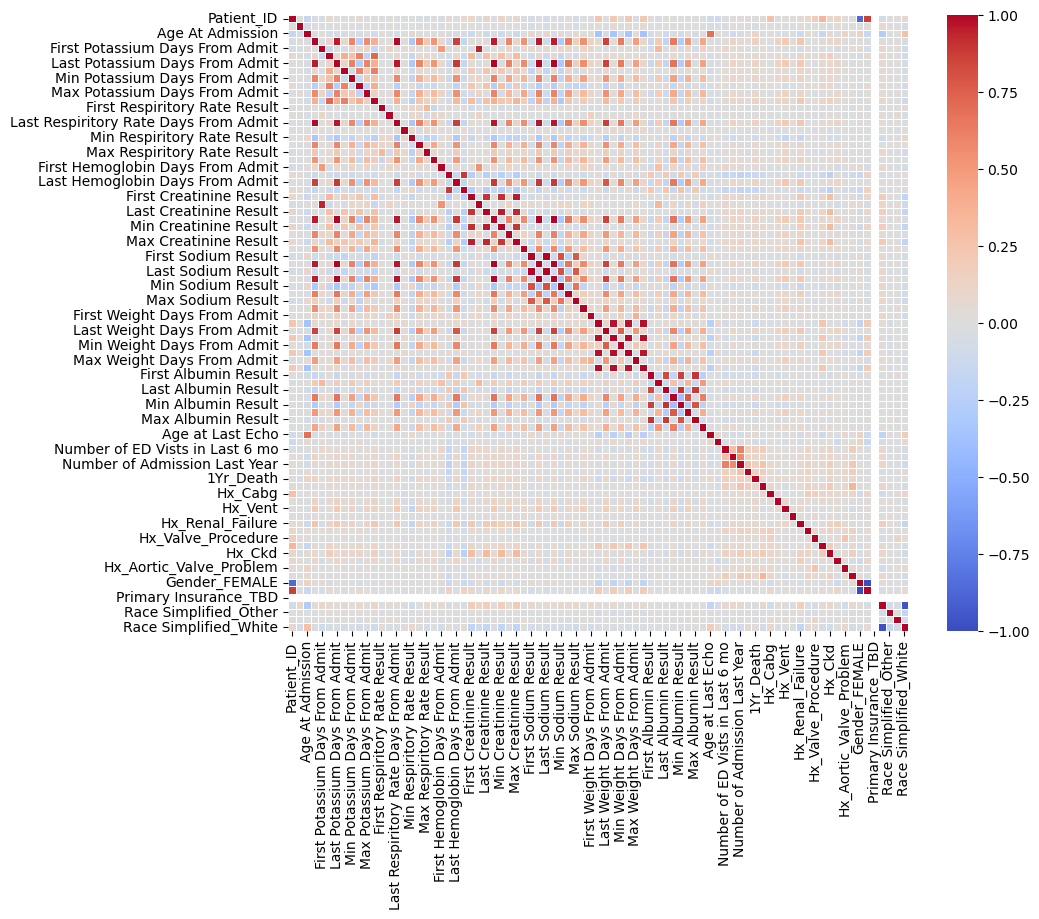

In [30]:
# Calculate correlation matrix for the encoded training data
corr_matrix = train_data_encoded.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.show()




In [31]:
# Look specifically at correlations with the target variable, if '1Yr_Death' is the target
print(corr_matrix['1Yr_Death'].sort_values(ascending=False))

1Yr_Death                                1.000000
Number of Admission Last Year            0.161975
Number of ED Vists in Last 6 mo          0.160229
Number of Outpatient Visits Last Year    0.144267
Last Respiritory Rate Days From Admit    0.136006
                                           ...   
Min Weight Result                       -0.122646
First Hemoglobin Result                 -0.125876
Min Albumin Result                      -0.126142
Last Hemoglobin Result                  -0.140753
Primary Insurance_TBD                         NaN
Name: 1Yr_Death, Length: 83, dtype: float64


Important Variables:
From the correlation results obtained, here are some of the variables that show a relatively stronger correlation with the target variable '1Yr_Death' and could be considered important for the model training:

1. Number of Admission Last Year (0.161975)
2. Number of ED Vists in Last 6 mo (0.160229)
3. Number of Outpatient Visits Last Year (0.144267)
4. Last Respiritory Rate Days From Admit (0.136010)
5. Length of Stay (Days) (0.135074)
6. Max Potassium Result (0.129192)
7. Last Creatinine Days From Admit (0.126925)
8. First Sodium Days From Admit (0.126405)
9. Last Sodium Days From Admit (0.126405)
10. Age At Admission (0.122127)

In [32]:
# Selecting the important variables as identified from the correlation analysis
important_features = [
    'Number of Admission Last Year',
    'Number of ED Vists in Last 6 mo',
    'Number of Outpatient Visits Last Year',
    'Last Respiritory Rate Days From Admit',
    'Length of Stay (Days)',
    'Max Potassium Result',
    'Last Creatinine Days From Admit',
    'First Sodium Days From Admit',
    'Last Sodium Days From Admit',
    'Age At Admission'
]

In [33]:
# Include the target variable
important_features.append('1Yr_Death')

In [34]:
# Filter the training DataFrame to include only the important features
train_data_filtered = train_data_encoded[important_features]

# Display the first few rows of the filtered training data
train_data_filtered.head()


,Number of Admission Last Year,Number of ED Vists in Last 6 mo,Number of Outpatient Visits Last Year,Last Respiritory Rate Days From Admit,Length of Stay (Days),Max Potassium Result,Last Creatinine Days From Admit,First Sodium Days From Admit,Last Sodium Days From Admit,Age At Admission,1Yr_Death
0,0,1,0,6.082639,6.008976,4.400000,5.605094,5.615089,5.615089,89.039440,0
1,0,0,8,2.426389,2.596738,4.300000,2.360872,2.358333,2.358333,69.429830,0
2,1,2,7,1.838194,2.046528,4.463955,4.537609,4.529143,4.529143,67.465759,0
3,2,1,0,1.402778,1.644444,4.200000,0.052083,0.052861,0.052861,61.347314,0
4,0,1,9,2.025316,2.253531,4.600000,1.735530,1.736111,1.736111,83.347254,1


#### Histograms for numerical selected features

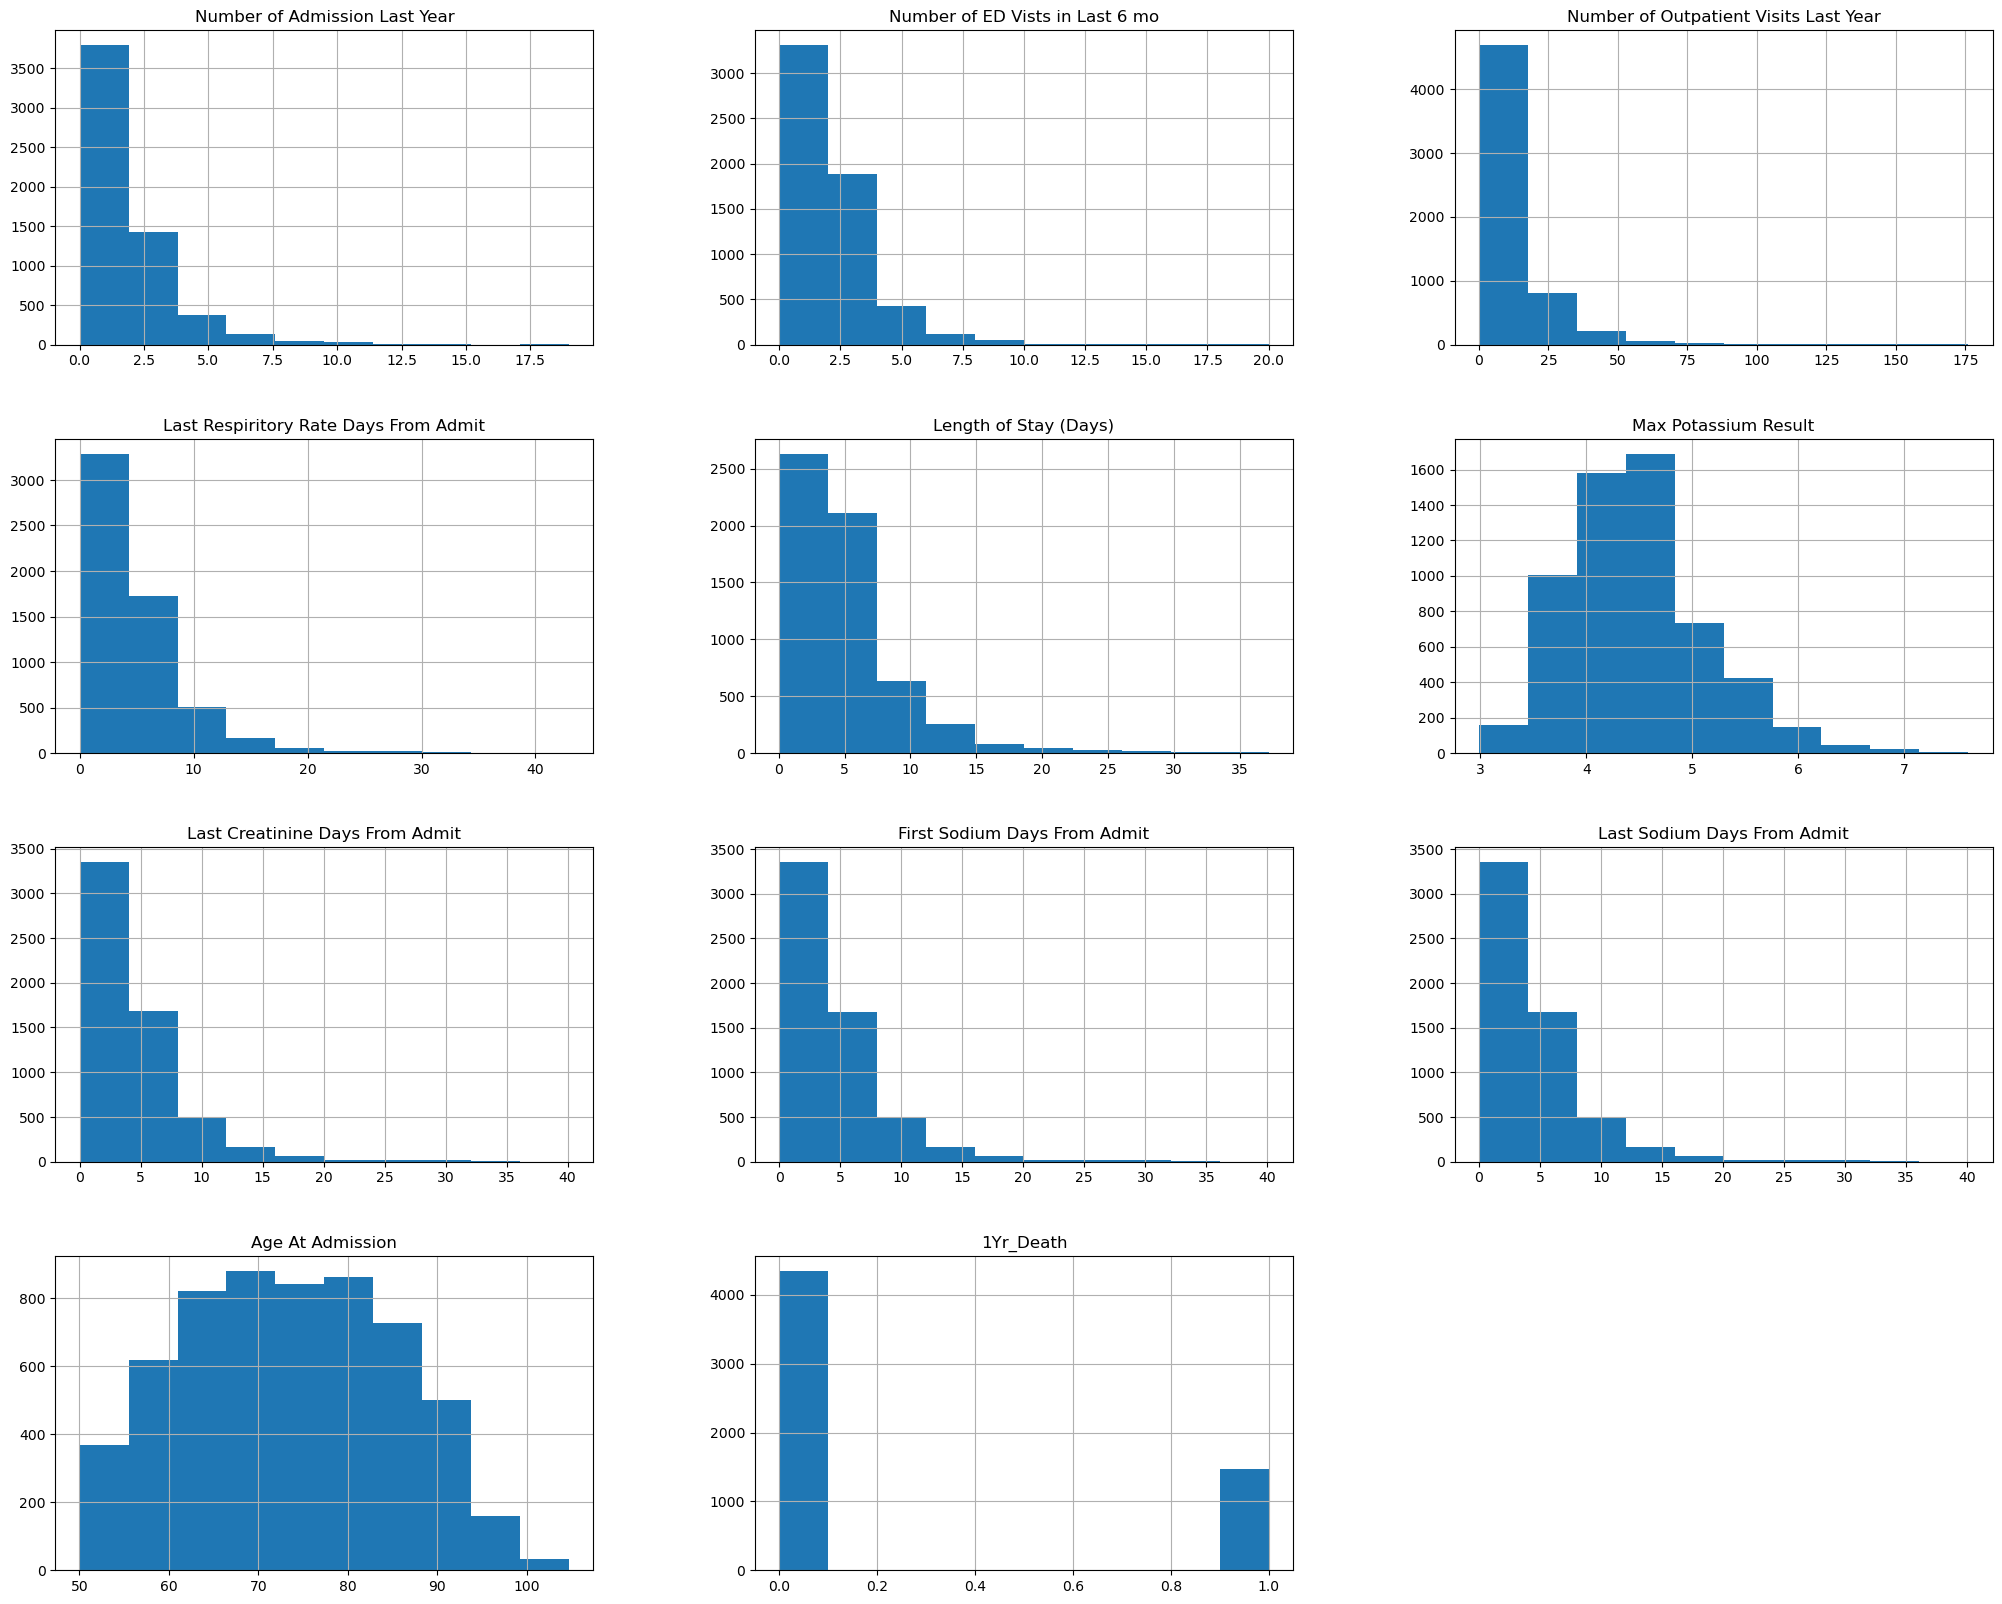

In [35]:
# Histograms for numerical features in the filtered training data
train_data_filtered.hist(figsize=(25, 20))
plt.show()


### Normalizing the Dataset



In [36]:
# Separate features and target variable
X = train_data_filtered.drop('1Yr_Death', axis=1)
y = train_data_filtered['1Yr_Death']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the feature data and transform it
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back into a DataFrame for easier handling
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add the target variable back to the DataFrame
df_scaled['1Yr_Death'] = y.values

# Keep the same name of variable
train_data_filtered = df_scaled

# Display the first few rows of the scaled DataFrame
train_data_filtered.head(10) 

,Number of Admission Last Year,Number of ED Vists in Last 6 mo,Number of Outpatient Visits Last Year,Last Respiritory Rate Days From Admit,Length of Stay (Days),Max Potassium Result,Last Creatinine Days From Admit,First Sodium Days From Admit,Last Sodium Days From Admit,Age At Admission,1Yr_Death
0,-0.752507,-0.393113,-0.754693,0.257575,0.200776,-0.100282,2.563106e-01,2.606285e-01,2.606285e-01,1.331800,0
1,-0.752507,-0.962936,-0.176049,-0.605184,-0.609170,-0.257084,-5.226496e-01,-5.209974e-01,-5.209974e-01,-0.342420,0
2,-0.212441,0.176710,-0.248379,-0.743979,-0.739770,0.000000,2.132578e-16,2.131640e-16,2.131640e-16,-0.510108,0
3,0.327625,-0.393113,-0.754693,-0.846723,-0.835211,-0.413886,-1.077006e+00,-1.074314e+00,-1.074314e+00,-1.032485,0
4,-0.752507,-0.393113,-0.103718,-0.699824,-0.690635,0.213321,-6.727987e-01,-6.703316e-01,-6.703316e-01,0.845815,1
5,-0.212441,-0.393113,-0.610032,-0.497195,-0.512895,-0.884291,-1.107283e-01,-1.071654e-01,-1.071654e-01,1.248587,0
6,1.407758,2.456001,0.113273,-0.318853,-0.305128,-0.257084,-3.500501e-01,-3.478530e-01,-3.478530e-01,0.808476,0
7,1.947824,0.176710,-0.393040,-0.010296,0.006103,-0.413886,5.900962e-02,6.001088e-02,6.001088e-02,-1.547580,0
8,-0.752507,-0.393113,-0.393040,-0.191256,-0.105066,-0.727490,-5.060848e-01,-5.038307e-01,-5.038307e-01,-0.968997,0
9,-0.752507,-0.393113,0.257934,-0.774525,-0.802243,-0.727490,-7.286840e-01,-7.260944e-01,-7.260944e-01,0.512302,0


#### Correlation Matrix of the selected variables

In [37]:
# Calculate correlation matrix for the filtered training data
Corr_train_data_filtered = train_data_filtered.corr()
Corr_train_data_filtered

,Number of Admission Last Year,Number of ED Vists in Last 6 mo,Number of Outpatient Visits Last Year,Last Respiritory Rate Days From Admit,Length of Stay (Days),Max Potassium Result,Last Creatinine Days From Admit,First Sodium Days From Admit,Last Sodium Days From Admit,Age At Admission,1Yr_Death
Number of Admission Last Year,1.000000,0.621213,0.275496,0.082671,0.079658,0.099220,0.080282,0.081247,0.081247,-0.077527,0.161975
Number of ED Vists in Last 6 mo,0.621213,1.000000,0.152254,0.019089,0.020310,0.048858,0.020665,0.020979,0.020979,-0.016081,0.160229
Number of Outpatient Visits Last Year,0.275496,0.152254,1.000000,0.009335,0.008912,0.018883,0.011258,0.012224,0.012224,0.027151,0.144267
Last Respiritory Rate Days From Admit,0.082671,0.019089,0.009335,1.000000,0.984565,0.383989,0.967442,0.966320,0.966320,-0.028987,0.136006
Length of Stay (Days),0.079658,0.020310,0.008912,0.984565,1.000000,0.385036,0.959408,0.958402,0.958402,-0.026743,0.135074
Max Potassium Result,0.099220,0.048858,0.018883,0.383989,0.385036,1.000000,0.387983,0.388466,0.388466,-0.085096,0.129192
Last Creatinine Days From Admit,0.080282,0.020665,0.011258,0.967442,0.959408,0.387983,1.000000,0.998551,0.998551,-0.035198,0.126925
First Sodium Days From Admit,0.081247,0.020979,0.012224,0.966320,0.958402,0.388466,0.998551,1.000000,1.000000,-0.036620,0.126405
Last Sodium Days From Admit,0.081247,0.020979,0.012224,0.966320,0.958402,0.388466,0.998551,1.000000,1.000000,-0.036620,0.126405
Age At Admission,-0.077527,-0.016081,0.027151,-0.028987,-0.026743,-0.085096,-0.035198,-0.036620,-0.036620,1.000000,0.122127


#### Heatmap of the correlation matrix

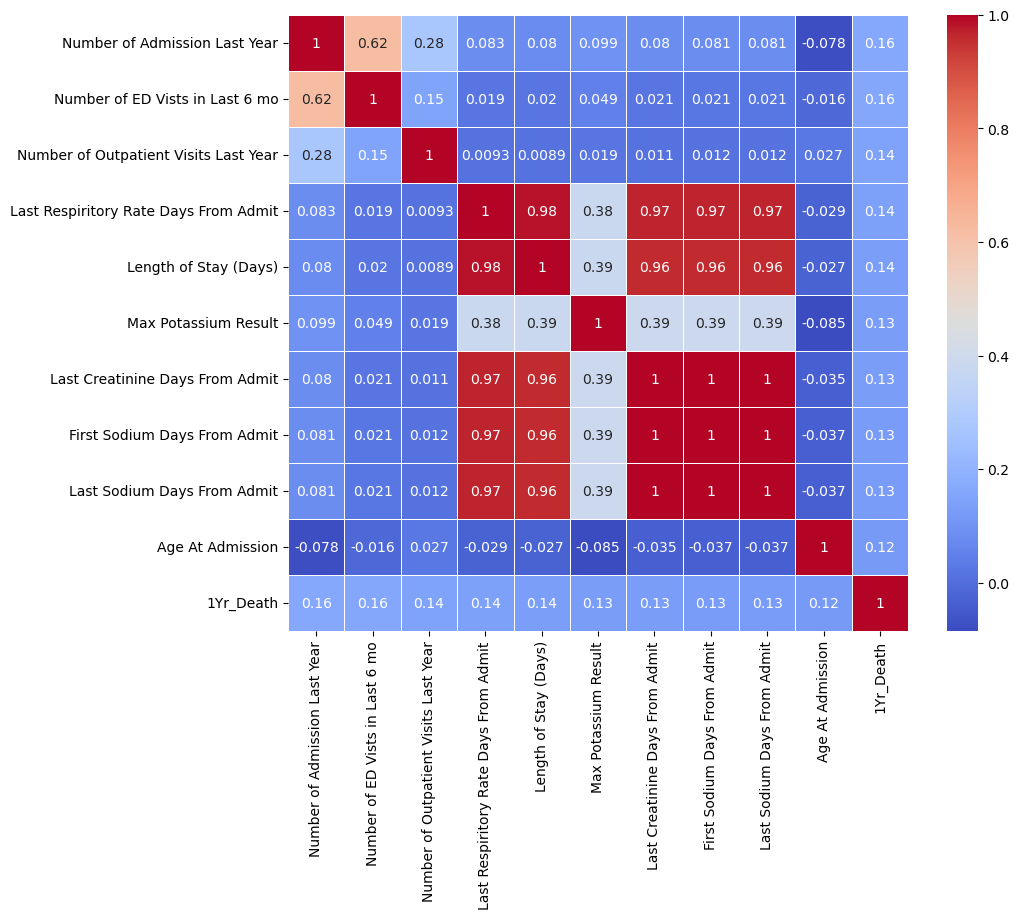

In [38]:
# Plot heatmap of the correlation matrix for the filtered training data
plt.figure(figsize=(10, 8))
sns.heatmap(Corr_train_data_filtered, cmap='coolwarm', linewidths=0.5, annot=True)
plt.show()


## Model Training

In [39]:
# Separating the target variable from the features
X = train_data_filtered.drop('1Yr_Death', axis=1)
y = train_data_filtered['1Yr_Death']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Model 1: Random Forest Classifier

In [40]:
# Train a RandomForest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the entire training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Model Evaluation

- ROC (Receiver Operating Characteristic) Curve
-  AUC (Area Under the Curve)

In [41]:
# Predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       882
           1       0.42      0.13      0.20       281

    accuracy                           0.75      1163
   macro avg       0.59      0.54      0.52      1163
weighted avg       0.69      0.75      0.69      1163



In [42]:
# Calculate and print Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7454858125537404


Text(0.5, 1.0, 'Confusion Matrix')

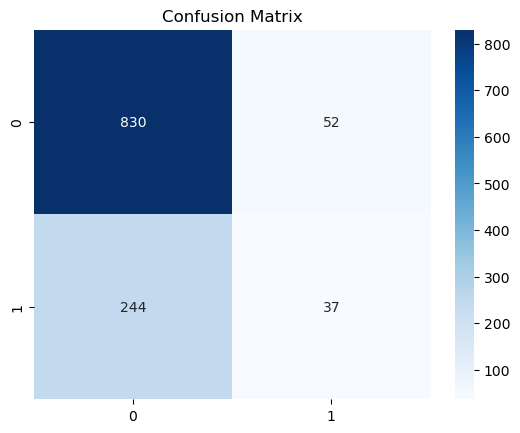

In [43]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')

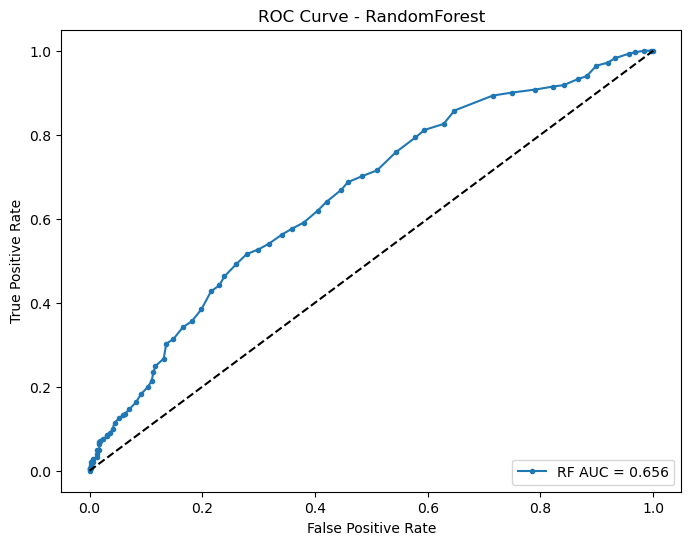

In [44]:
# Step 7: Calculate ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))  # Optional: Adjusts the size of the plot
plt.plot(fpr, tpr, label=f'RF AUC = {auc_score:.3f}', marker='.')
plt.plot([0, 1], [0, 1], 'k--')  # Adds a diagonal dashed line representing random chance

# Adding labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RandomForest')
plt.legend(loc='lower right')  # Adds a legend with the AUC label positioned in the lower right

# Display the plot
plt.show()


#### Model 2: Logistic Regression

In [45]:
# Initialize the model
logreg = LogisticRegression(random_state=42)

# Fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [46]:
# Make predictions
y_pred_logreg = logreg.predict(X_test)
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
auc_roc_logreg = roc_auc_score(y_test, y_prob_logreg)

print("Logistic Regression Accuracy:", round(accuracy_logreg, 2))
print("Logistic Regression AUC-ROC:", round(auc_roc_logreg, 2))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.75
Logistic Regression AUC-ROC: 0.71
              precision    recall  f1-score   support

           0       0.77      0.97      0.85       882
           1       0.42      0.08      0.13       281

    accuracy                           0.75      1163
   macro avg       0.59      0.52      0.49      1163
weighted avg       0.68      0.75      0.68      1163



In [47]:
# Calculate accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

Logistic Regression Accuracy: 0.7515047291487532


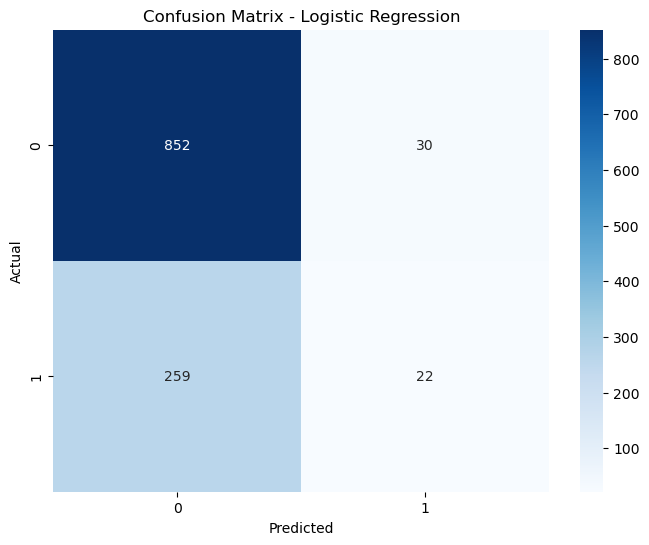

In [48]:
# Step 5: Draw Confusion Matrix
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

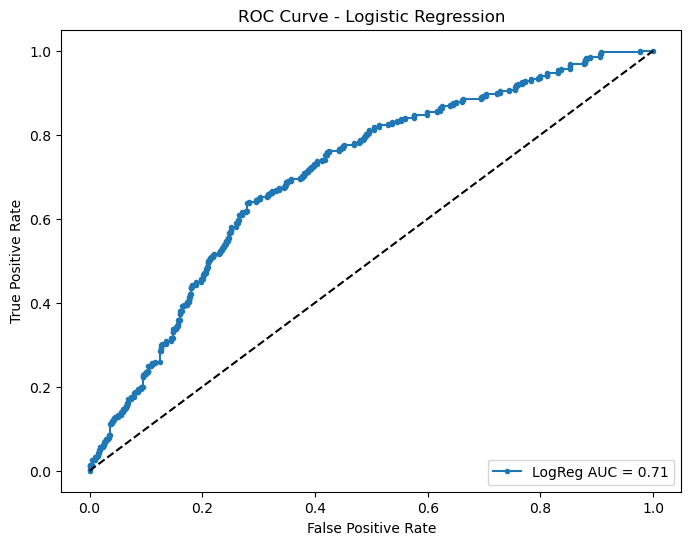

In [49]:
# Calculate the ROC curve data
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_prob_logreg)
auc_roc_logreg = roc_auc_score(y_test, y_prob_logreg)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'LogReg AUC = {auc_roc_logreg:.2f}', marker='.')
plt.plot([0, 1], [0, 1], 'k--')  # Adds a diagonal dashed line indicating the performance of a random classifier

# Adding labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')  # Adds a legend with the AUC score in the lower right

# Display the plot
plt.show()


Explanation:

An AUC score of 0.70 suggests that there is a 70 % chance that the model will rank a randomly chosen positive instance higher than a randomly chosen negative instance.

### Model 3: Support Vector Machine (SVM) Model

In [50]:
# Step 1: Initialize the model (with probability=True for ROC curve)
svm_model = SVC(probability=True, random_state=42)

# Step 2: Train the model
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [51]:
# Step 3: Predict the outcomes
y_pred_svm = svm_model.predict(X_test)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
# Evaluation metrics
print(classification_report(y_test, y_pred_svm))


              precision    recall  f1-score   support

           0       0.76      0.98      0.86       882
           1       0.40      0.04      0.07       281

    accuracy                           0.75      1163
   macro avg       0.58      0.51      0.46      1163
weighted avg       0.67      0.75      0.67      1163



In [52]:
# Step 4: Calculate accuracy
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.7540842648323302


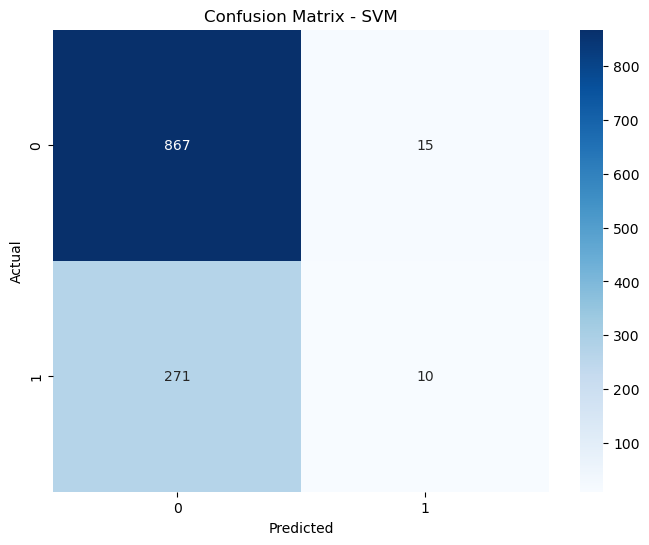

In [53]:
# Step 5: Draw Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

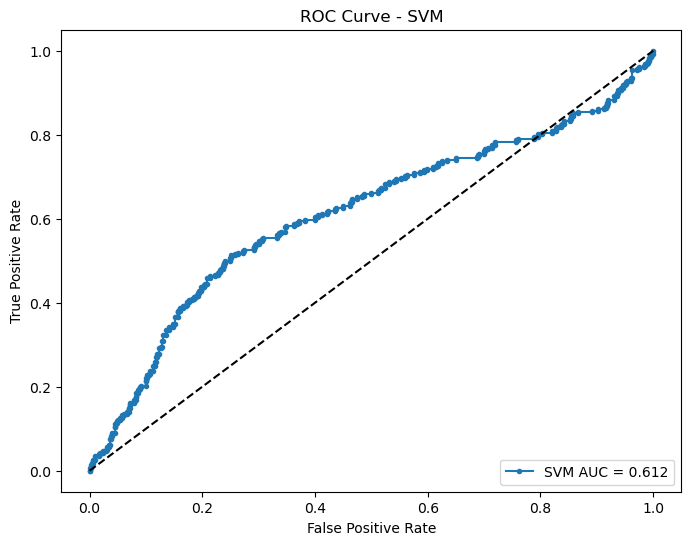

In [54]:
# Step 6: Calculate ROC Curve and AUC
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))  # Optional: Adjusts the size of the plot
plt.plot(fpr_svm, tpr_svm, label=f'SVM AUC = {auc_svm:.3f}', marker='.')
plt.plot([0, 1], [0, 1], 'k--')  # Adds a diagonal dashed line representing random chance

# Adding labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc='lower right')  # Adds a legend with the AUC label positioned in the lower right

# Display the plot
plt.show()


### Model 4: Gradient Boosting Classifier

In [55]:
# Step 1: Initialize the model
gbc_model = GradientBoostingClassifier(random_state=42)

# Step 2: Train the model
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [56]:
# Step 3: Predict the outcomes
y_pred_gbc = gbc_model.predict(X_test)
y_prob_gbc = gbc_model.predict_proba(X_test)[:, 1]

# Step 4: Calculate accuracy
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
# Evaluation metrics
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       882
           1       0.40      0.11      0.17       281

    accuracy                           0.75      1163
   macro avg       0.59      0.53      0.51      1163
weighted avg       0.68      0.75      0.69      1163



In [57]:
print("Gradient Boosting Accuracy:", accuracy_gbc)

Gradient Boosting Accuracy: 0.7454858125537404


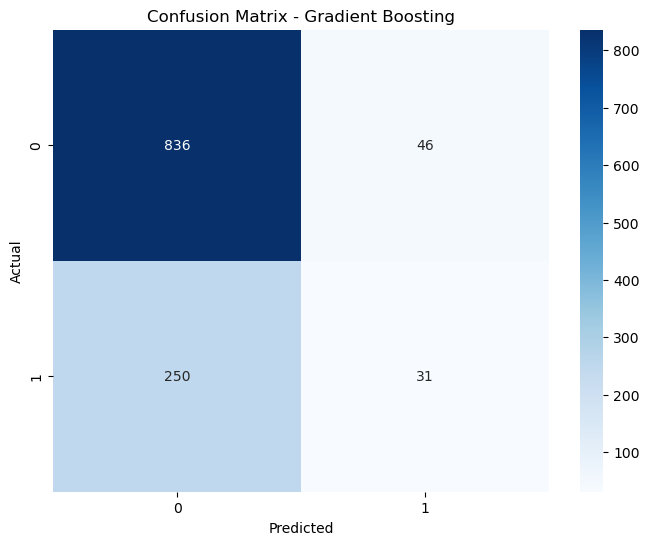

In [58]:
# Step 5: Draw Confusion Matrix
conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbc, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


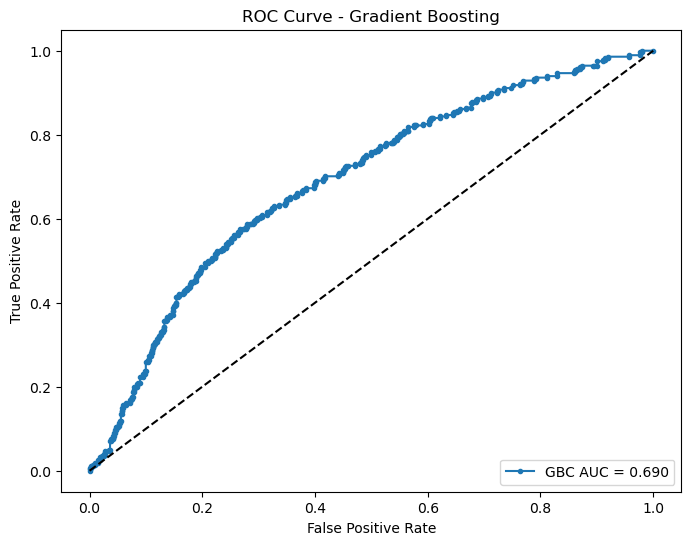

In [59]:
# Step 6: Calculate ROC Curve and AUC
fpr_gbc, tpr_gbc, thresholds_gbc = roc_curve(y_test, y_prob_gbc)
auc_gbc = roc_auc_score(y_test, y_prob_gbc)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gbc, tpr_gbc, label=f'GBC AUC = {auc_gbc:.3f}', marker='.')
plt.plot([0, 1], [0, 1], 'k--')  # This dashed line represents random chance performance

# Adding labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Gradient Boosting')
plt.legend(loc='lower right')  # Adding a legend that includes the AUC score

# Display the plot
plt.show()


### WORK ON THE TEST DATA

#### Step 1: Preprocess the Test Data

In [60]:
# Impute missing values in 'Primary Insurance' with the mode from the training data
primary_insurance_mode_test = train_data_filled['Primary Insurance'].mode()[0]
test_data['Primary Insurance'].fillna(primary_insurance_mode_test, inplace=True)

# Fill missing values in 'Race Simplified' with 'Unknown'
test_data['Race Simplified'].fillna('Unknown', inplace=True)

# Encode categorical variables using the same process as training data
test_data_encoded = pd.get_dummies(test_data, columns=categorical_columns)

# Ensure test data has the same columns as the training data
# This step is necessary if there are any columns in the train_data_encoded not present in the test_data_encoded or vice versa
missing_cols = set(train_data_encoded.columns) - set(test_data_encoded.columns)
for col in missing_cols:
    test_data_encoded[col] = 0
test_data_encoded = test_data_encoded[train_data_encoded.columns.drop('1Yr_Death')]

# Filter the test set to keep only important features
important_features_filtered = [feature for feature in important_features if feature != '1Yr_Death']
test_data_filtered = test_data_encoded[important_features_filtered]
test_data_filtered

,Number of Admission Last Year,Number of ED Vists in Last 6 mo,Number of Outpatient Visits Last Year,Last Respiritory Rate Days From Admit,Length of Stay (Days),Max Potassium Result,Last Creatinine Days From Admit,First Sodium Days From Admit,Last Sodium Days From Admit,Age At Admission
0,0,1,0,5.617148,5.818750,4.3,7.386320,7.388607,7.388607,75.761482
1,0,0,0,0.740008,0.906011,4.5,0.445139,0.443728,0.443728,50.325190
2,0,0,33,6.554714,6.537992,3.9,5.837906,5.834856,5.834856,67.305105
3,0,0,3,0.940972,1.062054,4.9,0.786111,0.788761,0.788761,86.082575
4,0,0,0,12.120643,12.316098,5.0,11.818850,11.826957,11.826957,66.974902
...,...,...,...,...,...,...,...,...,...,...
1474,0,1,0,4.695900,4.837957,5.1,4.334416,4.336699,4.336699,73.322855
1475,1,0,4,NaN,2.608333,NaN,NaN,NaN,NaN,83.830725
1476,0,1,3,5.536216,5.780993,4.2,5.216580,5.216213,5.216213,62.793411
1477,4,1,14,3.665278,3.993056,4.2,0.588889,0.583257,0.583257,81.970631


##### Normalize the test data


In [61]:
# Step 7: Normalize the test data using the same scaler fitted on the training data
test_data_scaled = scaler.transform(test_data_filtered)

# Step 8: Convert the scaled test data back into a DataFrame with the original column names
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data_filtered.columns)

# Keep the same name of the variable for consistency
test_data_filtered = test_data_scaled_df

In [62]:
test_data_filtered.head()

,Number of Admission Last Year,Number of ED Vists in Last 6 mo,Number of Outpatient Visits Last Year,Last Respiritory Rate Days From Admit,Length of Stay (Days),Max Potassium Result,Last Creatinine Days From Admit,First Sodium Days From Admit,Last Sodium Days From Admit,Age At Admission
0,-0.752507,-0.393113,-0.754693,0.147734,0.155623,-0.257084,0.683996,0.686275,0.686275,0.198160
1,-0.752507,-0.962936,-0.754693,-1.003116,-1.010489,0.056519,-0.982630,-0.980505,-0.980505,-1.973527
2,-0.752507,-0.962936,1.632213,0.368970,0.326346,-0.884291,0.312211,0.313373,0.313373,-0.523824
3,-0.752507,-0.962936,-0.537701,-0.955695,-0.973450,0.683727,-0.900761,-0.897697,-0.897697,1.079350
4,-0.752507,-0.962936,-0.754693,1.682352,1.697866,0.840529,1.748277,1.751485,1.751485,-0.552016


#### Step 2: Make Predictions on the Test Set : ??? use the best model 

In [63]:
# Impute missing values in the test data using the mean strategy
imputer = SimpleImputer(strategy='mean')
test_data_filtered = imputer.fit_transform(test_data_filtered)

In [64]:
# Make predictions on the test set
test_predictions = rf_model.predict(test_data_filtered)
test_probabilities = rf_model.predict_proba(test_data_filtered)[:, 1]

/home/ircad/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/home/ircad/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#### Step 3: Save the Predictions

In [65]:
# Assuming 'Patient_ID' is in the test_data
patient_ids = test_data['Patient_ID']

# Create a DataFrame to save predictions, including Patient_ID
output = pd.DataFrame({
    'Patient_ID': patient_ids,
    '1Yr_Death': test_predictions,
    'Probability': test_probabilities
})

# Save to a CSV file
output.to_csv('Igihozo_Heart_Failure_Test_Predictions.csv', index=False)

print("Test set predictions saved to 'Igihozo_Heart_Failure_Test_Predictions.csv'")

Test set predictions saved to 'Igihozo_Heart_Failure_Test_Predictions.csv'
